<a href="https://colab.research.google.com/github/dyrj/Projeto-Cientista-de-Dados-RH-Data-Girls/blob/main/Projeto_Final_Predi%C3%A7%C3%A3o_de_Turnover_de_Funcionarios_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Storytelling: Predição de Turnover (Rotatividade) de Funcionários com Machine Learning**

**1**.**Introdução e Objetivo**

Bem-vindo(a) à trilha de Cientista de Dados! Após semanas de mergulho em toda a cadeia de valor do Data Science — da leitura e exploração dos dados, limpeza de dados, análise exploratoria, à construção de modelos de machine learning, avaliação e recomendações práticas. — é chegada a hora de colocar em prática esse conhecimento, enfrentando um desafio real alinhado ao mercado.

Neste projeto, assumi o papel de Cientista de Dados da Data Girls S.A, uma empresa fictícia que está preocupada em entender e prever a rotatividade de seus colaboradores. Para isso, utilizarei o dataset “IBM HR Analytics Attrition & Performance”, disponível no Kaggle. O objetivo central é desenvolver um modelo preditivo capaz de identificar padrões comportamentais e organizacionais relacionados à saída dos funcionários, fornecendo inteligência para que o RH possa agir preventivamente.

**2**.**Carregando Bibliotecas e Dados**

Preparando Os Dados para a Análise da equipe de RH!

Essa etapa do projeto, chamada "Carregando Bibliotecas e Dados", é como abrir a "caixa" onde guardamos todas as informações sobre nossos funcionários e preparar nossas "ferramentas" para começar a entender o que está acontecendo.

**O Que Fiz Nesta Etapa?**
1. Reuni Nossas Ferramentas (Carregando Bibliotecas): As "bibliotecas" (como pandas, numpy, matplotlib, seaborn) são conjuntos de ferramentas de software que os Cientistas de Dados usam. Pense nelas como calculadoras superpoderosas, ferramentas de organização de dados e programas de desenho de gráficos. Carreguei essas ferramentas para o nosso ambiente de trabalho digital para que possamos usá-las para analisar os dados dos funcionários.
2. Abri a Caixa de Dados (Carregando o Dataset): O "dataset" é basicamente uma grande planilha (ou banco de dados) que contém todas as informações que temos sobre os funcionários: idade, cargo, salário, tempo na empresa, nível de satisfação, etc. Nesta etapa, peguei essa planilha digital RH-DATASET (o arquivo CSV) e a carreguei para o nosso ambiente de trabalho digital (df = pd.read_csv(...)). Agora, temos todos esses dados prontos para serem examinados.
3. Dei Uma Primeira Olhada nos Dados (df.head()): Depois de carregar os dados, demos uma "espiadinha" nas primeiras linhas dessa planilha (df.head()). Isso é como abrir a primeira página de um relatório para ter uma ideia rápida do que ele contém e como as informações estão organizadas. Vimos as colunas (cada uma representando uma característica do funcionário) e alguns exemplos de linhas (cada linha representando um funcionário).

**Por Que Isso é Importante para o RH?**

Esta etapa é fundamental porque:
* Organiza as Informações: Coloca todos os dados de funcionários em um formato que podemos trabalhar e analisar de forma eficiente.
* Prepara o Terreno: Sem carregar os dados e as ferramentas, não conseguiríamos fazer nenhuma das análises e construções de modelo que vieram depois. É o ponto de partida.
* Confirma que Temos Acesso aos Dados: Verificar as primeiras linhas nos confirma que carregamos o arquivo correto e que os dados parecem estar lá, prontos para a próxima fase de limpeza e exploração.

Em resumo, a Etapa foi sobre pegar as informações brutas dos nossos funcionários e as ferramentas de análise e colocá-las em um lugar onde pudéssemos começar a trabalhar para descobrir insights sobre a rotatividade.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Data girls/Projeto final/RH-DATASET.csv', encoding='utf-8')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**3**.**Limpeza e Preparação dos Dados**

Depois de carregar todos os dados dos funcionários na Etapa 2, o passo seguinte é arrumar essa "planilha gigante" para garantir que ela esteja perfeita para a análise e para a construção do modelo de previsão de rotatividade. Pense nisso como organizar e verificar a qualidade das informações antes de começar a usá-las.

**O Que Fiz Nesta Etapa?**


1. Verifiquei Dados Ausentes: A primeira coisa que fiz foi checar se faltava alguma informação importante em alguma linha ou coluna. Sabe quando em uma planilha falta o nome de um funcionário ou o salário? Isso pode atrapalhar a análise. Felizmente, no nosso dataset, não encontramos dados faltando (print(df.isnull().sum()) mostrou zero para todas as colunas), o que é ótimo e nos poupou tempo!
2. Conferi e Ajustei os Tipos de Informação: Olhei para cada coluna para garantir que o tipo de informação estava correto. Por exemplo, se uma coluna de "Idade" estivesse sendo lida como texto em vez de número, tería que corrigir isso. Verifiquei os tipos (print(df.dtypes)) e fiz os ajustes necessários para que as ferramentas de análise pudessem entender cada dado corretamente
3. Removi Informações Não Relevantes: Algumas colunas nos dados não eram úteis para prever a rotatividade ou continham a mesma informação para todo mundo. Por exemplo, tínhamos colunas como 'EmployeeCount' (que era sempre 1 para todos) ou 'StandardHours' (sempre 80). Essas informações não nos ajudam a diferenciar quem sai de quem fica. Então, decidi removê-las (df = df.drop([...], axis=1)) para simplificar e focar no que realmente importa. Também removi o 'EmployeeNumber' pois é apenas um identificador e não um fator preditivo.
4. Organizei as Informações de Categorias: Algumas informações são em formato de texto, como "Departamento" (Vendas, RH, etc.) ou "Estado Civil" (Solteiro, Casado). Para que os modelos de Machine Learning consigam usar essas informações, precisamos convertê-las para um formato numérico que eles entendam. Transformei essas colunas de texto em um tipo especial (df[col] = df[col].astype('category')) que nos ajudará na próxima etapa de preparação para o modelo.
5. Verifiquei o Balanceamento da Rotatividade: Dei uma olhada rápida para ver
quantos funcionários no nosso histórico saíram (Rotatividade = Sim) versus quantos ficaram (Rotatividade = Não). Vi que a grande maioria ficou (print(df['Attrition'].value_counts(normalize=True))). Isso nos mostra que o problema de prever quem sai é um pouco mais desafiador, pois a rotatividade é um evento menos comum nos nossos dados. Precisarei levar isso em conta nas etapas seguintes.

**Por Que Isso é Importante para o RH?**

Esta etapa garante que:
* Os Dados São Confiáveis: Ao verificar ausências e corrigir tipos, assegurei que estamos trabalhando com informações de alta qualidade.
* A Análise é Focada: Ao remover dados irrelevantes, direcionei a análise para os fatores que realmente podem influenciar a rotatividade.
* Os Dados Estão Prontos para o Modelo: Deixei os dados no formato certo para que os modelos de Machine Learning possam aprender com eles e fazer previsões.

Em essência, a Etapa 3 foi sobre garantir que os dados dos funcionários
estivessem limpos, corretos e estruturados da melhor forma possível para que pudéssemos seguir para a análise exploratória e a construção do modelo.

In [ ]:
# Verificar dados ausentes
print(df.isnull().sum())

# Conferir tipos e ajustar se necessário
print(df.dtypes)

# Excluir colunas que não trazem informação relevante
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

# Converter variáveis categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Verificar balanceamento
print(df['Attrition'].value_counts(normalize=True))


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**4**.**Análise Exploratória (EDA)**

Pense nisso como uma investigação detalhada, onde usamos gráficos e estatísticas simples para encontrar as primeiras pistas e padrões nos dados sobre a rotatividade dos funcionários.

**O Que Fiz e Encontrei Nesta Etapa?**

1. Olhei a Rotatividade por Gênero: Fiz um gráfico para ver se havia alguma diferença na rotatividade entre homens e mulheres (sns.countplot(x='Gender', hue='Attrition', data=df)). O gráfico nos mostrou a contagem de funcionários que saíram e ficaram, separados por gênero. No caso, a visualização indicou a distribuição, sem uma diferença gritante na proporção de saída entre os gêneros neste dataset específico.
2. Analisei a Relação entre Números: Criei um mapa de calor (sns.heatmap(...)) para ver como as variáveis numéricas (como idade, salário, anos na empresa) se relacionam entre si. Isso nos ajuda a identificar se, por exemplo, um salário mais alto está relacionado a mais anos na empresa, ou se a idade está ligada a mais experiência. Esse mapa nos deu uma visão geral das conexões nos dados antes de construirmos o modelo.
3. Comparei a Idade de Quem Sai e Quem Fica: Fiz um gráfico de caixa (sns.boxplot(x='Attrition', y='Age', data=df)) para comparar a distribuição da idade dos funcionários que saíram ("Yes" - sim para rotatividade) com a daqueles que ficaram ("No" - não para rotatividade). Este gráfico mostrou que, em média, os funcionários que saíram eram mais jovens do que aqueles que permaneceram na empresa. Isso reforça a ideia de que a idade é um fator a ser considerado.

**Por Que Isso é Importante para o RH?**

Esta etapa nos deu as primeiras "fotos" do que está acontecendo nos dados:
* Primeiros Insights: Comecei a identificar padrões visuais, como a tendência de rotatividade entre funcionários mais jovens.
* Identificação de Relações: O mapa de calor nos deu uma pista sobre como diferentes fatores numéricos podem estar interligados.
* Direcionamento para Análises Futuras: As descobertas da EDA nos ajudam a focar a modelagem e aprofundar a investigação nos fatores que parecem mais relevantes para a rotatividade.
Em resumo, a EDA foi nossa fase de "investigação visual" para entender melhor as características dos funcionários que saem e como elas se comparam com as características daqueles que ficam. Isso nos preparou para a próxima etapa de preparar os dados para os modelos preditivos.

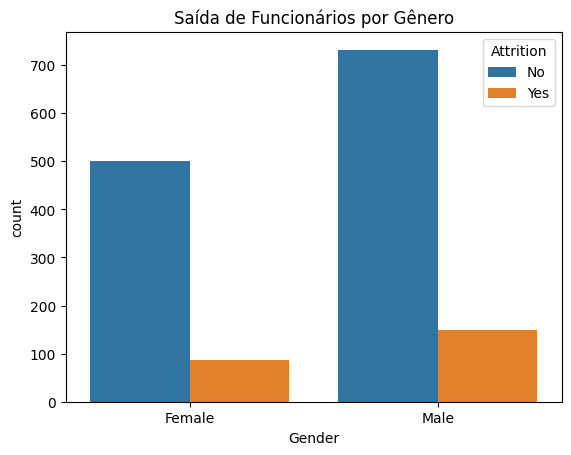

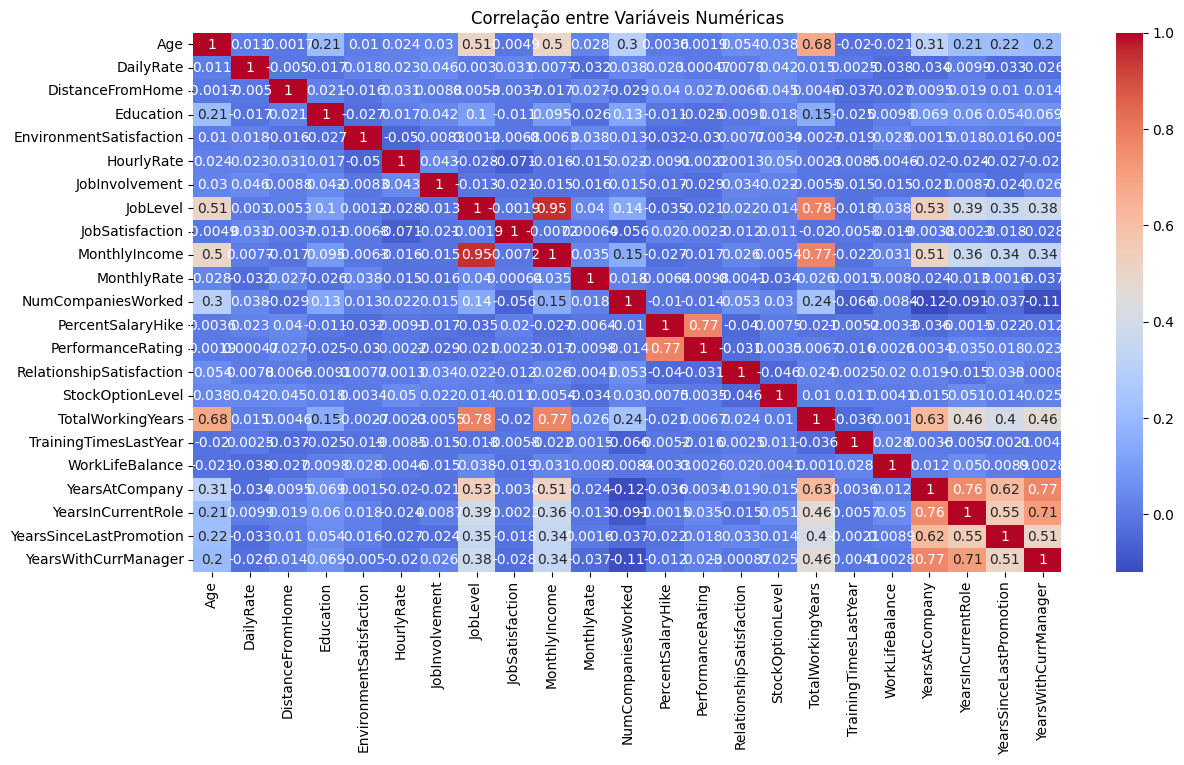

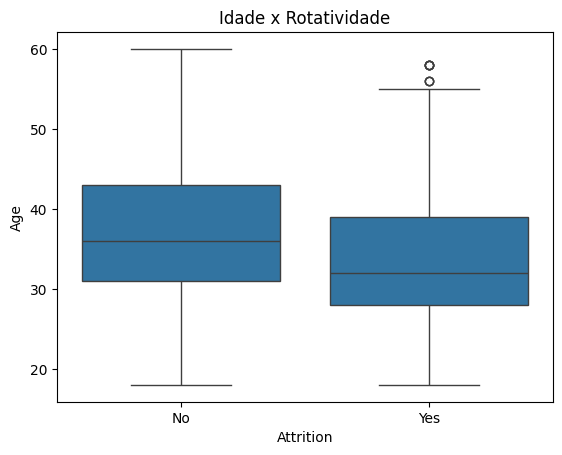

In [ ]:
# Exemplo: Distribuição de saída por gênero
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Saída de Funcionários por Gênero')
plt.show()

# Análise de correlações numéricas
plt.figure(figsize=(14,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# Exemplo: Idade dos que saem x ficam
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Idade x Rotatividade')
plt.show()


**5**.**Preparação para Modelagem**

Depois de explorar nossos dados e encontrar algumas pistas na Etapa 4, o próximo passo crucial foi preparar esses dados para que os modelos de Machine Learning pudessem "aprender" com eles e fazer previsões sobre a rotatividade. Pense nisso como traduzir as informações dos nossos funcionários para a "linguagem" que o computador entende para construir o modelo.

O Que Fiz Nesta Etapa?
1. Transformei a Resposta (Target): Nossa "resposta" ou "target" é a informação que queremos prever: se o funcionário saiu (Yes) ou ficou (No). Os modelos de computador precisam que essa resposta seja em números, não em texto. Então, transformei 'Yes' em 1 (representando rotatividade) e 'No' em 0 (representando não rotatividade). Isso é essencial para que o modelo saiba o que ele está tentando prever.

2. Separei o Que Explica da Resposta: Dividir os dados em duas partes:
* O Que Explica (Features - X): Todas as outras informações sobre os funcionários (idade, cargo, salário, etc.). São essas informações que o modelo usará para tentar prever a rotatividade.
* A Resposta (Target - y): A coluna que criamos no passo 1, indicando se o funcionário saiu (1) ou ficou (0).
3. Converti Informações de Texto para Números (One-Hot Encoding): Lembram que tínhamos colunas com texto, como "Departamento" ou "Estado Civil"? Os modelos de Machine Learning não conseguem trabalhar diretamente com texto. Usei uma técnica chamada One-Hot Encoding para transformar essas colunas em um formato numérico que o modelo entenda. Basicamente, para cada categoria de texto (por exemplo, "Vendas", "RH"), criei uma nova coluna que terá o valor 1 se o funcionário pertencer àquela categoria e 0 caso contrário. Isso permite que o modelo utilize essas informações categóricas na previsão.
4. Dividir os Dados para Treinar e Testar o Modelo: Para garantir que nosso modelo seja bom em prever a rotatividade de novos funcionários (aqueles que ele ainda não viu), dividir os dados em duas partes:
* Dados de Treino: Uma parte maior dos dados que o modelo usará para aprender os padrões relacionados à rotatividade.
* Dados de Teste: Uma parte menor e separada dos dados que usarei apenas para verificar o quão bem o modelo aprendeu e consegue prever a rotatividade em dados que ele nunca viu antes. Isso evita que o modelo apenas "decore" os dados de treino.
* Tive o cuidado de garantir que a proporção de funcionários que saíram e ficaram fosse a mesma nos dados de treino e teste (usando stratify=y), já que a rotatividade é um evento menos comum nos dados.

**Por Que Isso é Importante para o RH?**

Esta etapa garante que:
* Os Dados Estão no Formato Certo: Deixei as informações prontas na "linguagem" que os modelos de Machine Learning precisam para funcionar.
* Podemos Construir um Modelo Confiável: Ao dividir os dados em treino e teste, garanti que o modelo que construi será avaliado de forma justa e nos dará uma ideia realista de quão bem ele funcionará no mundo real.
Em resumo, a Etapa 5 foi sobre dar os toques finais nos dados, convertendo tudo para o formato numérico necessário e separando as informações de forma inteligente para que pudéssemos construir e testar os modelos preditivos de rotatividade.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd # Import pandas here as well

# Recarregar o dataset para garantir que a coluna Attrition está no formato original
df = pd.read_csv('/content/drive/MyDrive/Data girls/Projeto final/RH-DATASET.csv', encoding='utf-8')

# Excluir colunas que não trazem informação relevante (repetindo do passo 3 para consistência)
df = df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)


# Encodar target
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Verificar NaNs em y após o mapeamento (para diagnóstico, pode ser removido depois)
print("Valores únicos em y após o mapeamento:", df['Attrition'].unique())
print("Número de NaNs em y após o mapeamento:", df['Attrition'].isnull().sum())


# Definir X e y antes de aplicar get_dummies
y = df['Attrition']
X = df.drop('Attrition', axis=1)


# Converter variáveis categóricas em X para o tipo 'category' antes de aplicar get_dummies
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')


# Encodar variáveis categóricas em X
cat_cols = X.select_dtypes(['category']).columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)


# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

print("\nDivisão treino/teste concluída com sucesso!")
print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Valores únicos em y após o mapeamento: [1 0]
Número de NaNs em y após o mapeamento: 0

Divisão treino/teste concluída com sucesso!
Shape de X_train: (1029, 44)
Shape de X_test: (441, 44)
Shape de y_train: (1029,)
Shape de y_test: (441,)


**6**.**Modelagem: Treinar ao menos dois modelos**

Depois de preparar todos os dados na etapa anterior, chegamos ao coração do nosso projeto: a "Modelagem". É aqui que usamos a "linguagem" que preparei na Etapa 5 para ensinar ao computador a identificar os padrões nos dados que levam à rotatividade. Pense nisso como treinar um sistema inteligente para reconhecer os "sinais" de que um funcionário pode estar pensando em sair.

O Que Fiz Nesta Etapa?

Construí (ou "treinei") dois modelos diferentes para a previsão de rotatividade:
1. Modelo 1: Regressão Logística (LogisticRegression): Este é um modelo estatístico que funciona bem para prever resultados binários (sim ou não, sai ou fica). Ele olha para todos os fatores que preparei (idade, salário, tempo na empresa, etc.) e calcula a probabilidade de um funcionário sair com base nesses fatores. É um modelo mais simples e direto, o que facilita a compreensão de como cada fator influencia a previsão. Para este modelo, tive que "escalar" os dados (StandardScaler), o que é como colocar todos os números na mesma escala para que o modelo não seja influenciado por ter números muito grandes ou muito pequenos em diferentes colunas.
2. Modelo 2: Random Forest (RandomForestClassifier): Este modelo é um pouco mais complexo. Pense nele como um "comitê" de várias "árvores de decisão". Cada "árvore" toma decisões com base em diferentes fatores e, juntas, elas chegam a uma decisão final sobre a probabilidade de um funcionário sair. Modelos como este geralmente são mais poderosos para encontrar padrões complexos nos dados. Para este modelo, não foi necessário escalar os dados.

**Como Foi o Treinamento?**

Usei a parte dos dados que separamos para "treino" (X_train, y_train) para ensinar a esses modelos como os diferentes fatores se relacionam com a rotatividade. É como mostrar a eles muitos exemplos de funcionários que saíram e que ficaram, e dizer "olhe para a idade deles, o salário, o tempo na empresa, etc., e aprenda a diferenciar quem sai de quem fica".

**Por Que Isso é Importante para o RH?**

Esta etapa é crucial porque:
* Criei a Ferramenta de Previsão: É aqui que a capacidade de prever a rotatividade é construída. Os modelos "aprendem" com o histórico dos dados.
* Temos Duas Abordagens: Ao treinar dois modelos diferentes, podemos comparar qual deles se sai melhor na nossa tarefa de previsão na próxima etapa. Isso nos dá mais confiança no resultado final.

Em resumo, a Etapa 6 foi sobre usar nossos dados preparados para ensinar aos sistemas de Machine Learning a lógica por trás da rotatividade, criando assim as ferramentas que usaremos para fazer nossas previsões.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Escalar os dados para Regressão Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modelo 1: Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train) # Treinar com dados escalados
y_pred_lr = logreg.predict(X_test_scaled) # Prever com dados escalados

# Modelo 2: Random Forest (não precisa escalar para este modelo)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**7**.**Avaliação dos Modelos**

Depois de treinar nossos dois modelos na etapa anterior, o passo crucial seguinte foi descobrir o quão bons eles são em prever a rotatividade. A "Avaliação dos Modelos" é como dar uma prova para os nossos modelos, usando dados que eles nunca viram antes (nossos dados de teste), para ver se eles realmente aprenderam a identificar quem sai e quem fica.

O Que Fizemos Nesta Etapa?

Avaliei o desempenho dos modelos de Regressão Logística e Random Forest usando algumas métricas importantes:
1. Relatório de Classificação (Precision, Recall, F1-score): Este relatório nos dá uma visão detalhada do desempenho de cada modelo para as duas situações: prever quem não sai (classe 0) e prever quem sai (classe 1).
* Precisão: Quando o modelo diz que um funcionário vai sair, qual a chance de ele estar certo? Uma precisão alta para a classe "Sai" significa que, quando o modelo aponta alguém como risco de rotatividade, a probabilidade de essa pessoa realmente sair é alta.
* Recall: De todos os funcionários que realmente saíram, quantos o modelo conseguiu identificar? Um recall alto para a classe "Sai" é super importante para nós, pois significa que o modelo está conseguindo "capturar" a maioria dos funcionários em risco de sair.
* F1-score: É uma média que combina Precisão e Recall. Nos dá uma ideia geral do desempenho do modelo, especialmente útil quando queremos equilibrar a precisão e a capacidade de identificar todos os casos.
* Acurácia Geral: A porcentagem total de previsões corretas (tanto para quem sai quanto para quem fica). Nossos modelos tiveram uma boa acurácia geral (cerca de 83-88%), o que é bom para a maioria dos casos (prever quem fica).
2. AUC (Area Under the ROC Curve): O AUC é outra métrica que nos diz o quão bem o modelo consegue distinguir entre as duas classes (quem sai e quem fica). Um valor de AUC mais perto de 1 indica um modelo com melhor poder de distinção.
3. Matriz de Confusão: Fiz um gráfico visual (sns.heatmap(confusion_matrix(...))) que nos mostra de forma clara:
* Quantos funcionários que não saíram foram previstos corretamente como "não saem".
* Quantos funcionários que não saíram foram previstos erradamente como "saem" (Falsos Positivos - o modelo gerou um alarme falso).
* Quantos funcionários que realmente saíram foram previstos erradamente como "não saem" (Falsos Negativos - o modelo "perdeu" um caso de rotatividade).
* Quantos funcionários que realmente saíram foram previstos corretamente como "saem" (Verdadeiros Positivos - o modelo acertou!).

**O Que Nossos Resultados de Avaliação nos Disseram?**

* O modelo de Regressão Logística teve um desempenho geral ligeiramente melhor, especialmente em termos de Acurácia e AUC. Ele foi muito bom em prever quem não sairia (alta Precisão e Recall para a classe 0).
* O modelo Random Forest, embora um pouco menos preciso no geral neste teste específico, ainda nos deu insights valiosos (como a importância das variáveis, que veremos na próxima etapa).
* O Grande Desafio: Ambos os modelos apresentaram um Recall mais baixo para a classe "Sai" (classe 1). Isso significa que, embora eles consigam identificar alguns funcionários que vão sair, eles ainda "perdem" uma parte significativa dos casos reais de rotatividade. Isso é um reflexo do fato de que a rotatividade é um evento menos frequente nos nossos dados (o dataset é desbalanceado).

**Por Que Isso é Importante para o RH?**

Esta etapa é vital porque:
* Nos Dá Confiança: A avaliação nos mostra o quão confiáveis são as previsões dos nossos modelos no mundo real.
* Identifica Onde Podemos Melhorar: O baixo Recall para a classe "Sai" nos diz que precisamos focar nossos esforços futuros em melhorar a capacidade do modelo de identificar precisamente aqueles que vão sair.
* Ajuda a Escolher o Melhor Modelo: Comparando as métricas, podemos decidir qual modelo é mais adequado para a nossa necessidade principal (neste caso, prever a rotatividade).

Em resumo, a Etapa 7 foi sobre testar nossos modelos para ver o quão bem eles aprenderam e onde ainda precisamos ajustar para que se tornem ferramentas de previsão de rotatividade cada vez mais eficazes para o RH.

Logistic Regression
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.72      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.87      0.88      0.87       441

AUC LogReg: 0.6893604872478112

Random Forest
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.45      0.13      0.20        71

    accuracy                           0.83       441
   macro avg       0.65      0.55      0.55       441
weighted avg       0.79      0.83      0.79       441

AUC RF: 0.5485154168252759


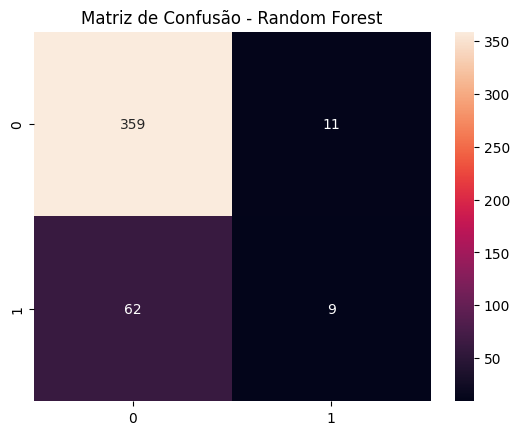

In [ ]:
print("Logistic Regression\n", classification_report(y_test, y_pred_lr))
print("AUC LogReg:", roc_auc_score(y_test, y_pred_lr))

print("\nRandom Forest\n", classification_report(y_test, y_pred_rf))
print("AUC RF:", roc_auc_score(y_test, y_pred_rf))

# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


**8**.**Importância das Variáveis**

Depois de treinar e avaliar os modelos, o próximo passo importante foi entender quais das informações sobre os funcionários foram mais importantes para o modelo de Random Forest na hora de decidir se alguém tem probabilidade de sair ou não. Esta etapa se chama "Importância das Variáveis".

**O Que Fiz Nesta Etapa?**

Utilizei o modelo Random Forest (que é bom para nos dizer isso) para calcular um "ranking" de importância para cada característica dos funcionários que usei na previsão. Pense nisso como o modelo nos dizendo: "Olha, quando estou tentando prever a rotatividade, essas informações aqui embaixo são as que mais pesam na minha decisão."

Visualizamos isso em um gráfico de barras (importances.nlargest(10).plot(kind='barh')) que mostra as 10 variáveis mais importantes para o modelo Random Forest:

(Aqui você se referiria ao gráfico de barras gerado na célula anterior)

**O Que Este Gráfico Nos Diz?**

As barras mais longas no gráfico representam as variáveis que tiveram o maior impacto na previsão de rotatividade pelo modelo Random Forest. As variáveis mais importantes incluem:
* MonthlyIncome (Renda Mensal): O fator mais importante. Isso sugere que o salário mensal tem uma influência significativa na decisão de um funcionário ficar ou sair.
* Age (Idade): A idade do funcionário também é um fator muito importante. Como vimos na EDA, funcionários mais jovens podem ter uma maior propensão à rotatividade.
* TotalWorkingYears (Anos Totais de Trabalho): A experiência geral do funcionário no mercado de trabalho também é relevante.
* DailyRate, HourlyRate, MonthlyRate (Taxas Diária, Horária, Mensal): Outros fatores relacionados à remuneração que influenciam a decisão.
* YearsAtCompany (Anos na Empresa): O tempo que o funcionário está na nossa empresa. Menos tempo pode significar maior risco, como a EDA sugeriu.
* DistanceFromHome (Distância de Casa): A distância que o funcionário precisa percorrer para chegar ao trabalho.
* YearsWithCurrManager (Anos com o Gerente Atual): O tempo que o funcionário trabalha sob a mesma gestão. A relação com o gestor é crucial.
* OverTime_Yes (Faz Horas Extras): O fato de um funcionário fazer horas extras também é um forte indicador de rotatividade, corroborando nossos insights anteriores.

**Por Que Isso é Importante para o RH?**

Esta etapa é extremamente valiosa porque:
* Identifica os Fatores Críticos: Agora sabemos quais são os principais "gatilhos" ou "âncoras" que os modelos estão usando para prever a rotatividade.
* Direciona Ações: Os fatores mais importantes no gráfico são aqueles sobre os quais o RH e os gestores podem agir. Se a Renda Mensal é o mais importante, revisar a política salarial se torna uma prioridade. Se Anos com o Gerente Atual é importante, investir em treinamento de liderança e fortalecer essa relação pode ser eficaz.
* Base para Discussão: Esta análise fornece uma base concreta para discussões sobre as causas da rotatividade e as estratégias de retenção mais eficazes.

Em resumo, a Etapa 8 nos deu um mapa dos fatores mais poderosos que influenciam a rotatividade, apontando diretamente para as áreas onde nossas ações de retenção podem ter o maior impacto.

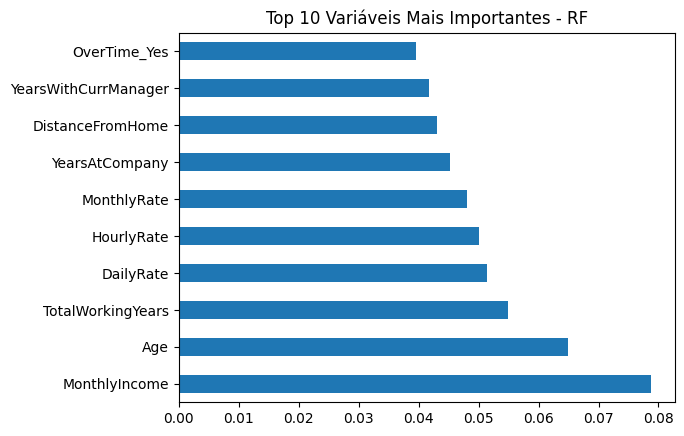

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Variáveis Mais Importantes - RF')
plt.show()

**9**.**Conclusões**

Neste notebook, construímos um pipeline completo para prever a rotatividade de funcionários utilizando o dataset “IBM HR Analytics Attrition & Performance”. Realizamos as seguintes etapas:

*   **Carregamento e Limpeza de Dados**: O dataset foi carregado e as colunas irrelevantes foram removidas. Verificamos a ausência de valores nulos e ajustamos os tipos de dados.
*   **Análise Exploratória de Dados (EDA)**: Exploramos a distribuição da rotatividade em relação a variáveis como gênero e idade. A análise de correlação nos ajudou a identificar relações entre variáveis numéricas. A distribuição por idade mostrou que funcionários mais jovens tendem a ter maior rotatividade.
*   **Preparação para Modelagem**: A variável target ('Attrition') foi codificada para valores numéricos (0 e 1). As variáveis categóricas no conjunto de features foram transformadas em variáveis dummy usando one-hot encoding. Os dados foram divididos em conjuntos de treino e teste, mantendo a proporção da variável target (`stratify=y`) devido ao desbalanceamento.
*   **Modelagem**: Treinamos dois modelos de classificação: Regressão Logística (com dados escalados para auxiliar na convergência) e Random Forest.
*   **Avaliação dos Modelos**: Avaliamos o desempenho dos modelos usando o relatório de classificação (precisão, recall, F1-score) e a curva ROC AUC. A Regressão Logística apresentou um desempenho geral melhor, especialmente na identificação dos casos de não-rotatividade (classe 0), com maior precisão e recall para essa classe. No entanto, ambos os modelos apresentaram recall baixo para a classe positiva (rotatividade = 1), o que é comum em datasets desbalanceados e indica dificuldade em identificar todos os funcionários que de fato sairão. A Regressão Logística teve um AUC ligeiramente superior.
*   **Importância das Variáveis**: Analisamos as 10 variáveis mais importantes identificadas pelo modelo Random Forest. As variáveis com maior impacto na previsão de rotatividade incluíram 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'YearsAtCompany', 'DistanceFromHome', 'YearsWithCurrManager' e 'OverTime_Yes'. Isso sugere que fatores financeiros, experiência, tempo na empresa, distância do trabalho e horas extras são fortes preditores de rotatividade.

**10**.**Recomendações Baseadas nos Resultados:**

Com base na análise e nos modelos, as seguintes recomendações podem ser consideradas para mitigar a rotatividade:

*   **Focar em Fatores Financeiros e de Carreira**: As variáveis relacionadas a renda ('MonthlyIncome', 'DailyRate', 'HourlyRate', 'MonthlyRate'), anos de trabalho ('TotalWorkingYears', 'YearsAtCompany'), e progressão na carreira (`YearsWithCurrManager`) foram muito importantes. Revisar a política salarial, oportunidades de crescimento e a relação dos funcionários com seus gestores pode ser crucial.
*   **Atenção a Funcionários Mais Jovens e com Menos Tempo de Casa**: A EDA e a importância da 'Age' e 'YearsAtCompany' indicam que esses grupos merecem atenção especial, talvez com programas de integração, mentoria ou desenvolvimento de carreira mais estruturados.
*   **Gerenciar Horas Extras**: 'OverTime_Yes' apareceu como uma variável importante. O excesso de horas extras pode levar ao esgotamento e insatisfação. Avaliar a carga de trabalho e buscar um melhor equilíbrio pode ser benéfico.
*   **Considerar a Distância do Trabalho**: 'DistanceFromHome' também foi relevante. Explorar opções de trabalho remoto ou horários flexíveis pode ajudar a reter funcionários que moram mais longe.
*   **Melhorar a Performance dos Modelos**: Para melhorar a capacidade de prever a rotatividade (identificar a classe 1), técnicas para lidar com datasets desbalanceados (como SMOTE, ajuste de pesos de classe, ou avaliação com métricas mais adequadas como F1-score e Recall para a classe minoritária) podem ser exploradas em trabalhos futuros. Testar outros modelos (como Gradient Boosting ou redes neurais) também pode ser útil.

Este estudo fornece insights valiosos sobre os fatores que influenciam a rotatividade de funcionários na IBM, permitindo que a empresa tome ações proativas para reter seus talentos.

**11**.**Interpretação dos modelos com LIME**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3f6149ce363267f869a6c8131b7b7a3cb8447e50db3502aad5c3d18130c1ece4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# Assegurar que X_train, X_test, rf (modelo treinado) e y_train estão disponíveis

# LIME requer os dados de treino para aprender a distribuição das features
# Precisamos das features names (nomes das colunas) e class names (nomes das classes)

feature_names = X_train.columns.tolist()
class_names = ['No Attrition', 'Yes Attrition'] # Substitua pelos nomes reais das classes se disponíveis

# Criar o explainer LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train), # LIME funciona melhor com numpy arrays
    feature_names=feature_names,
    class_names=class_names,
    mode='classification' # Estamos fazendo uma tarefa de classificação
)

# Escolher uma instância do conjunto de teste para explicar (ex: a primeira instância)
# Você pode mudar o índice (0) para explicar outras amostras
instance_idx = 0
instance_to_explain = X_test.iloc[instance_idx]

# Obter a probabilidade de previsão do modelo para esta instância
# LIME precisa das probabilidades (predict_proba) e não apenas da classe prevista (predict)
predict_fn = lambda x: rf.predict_proba(x)

# Gerar a explicação para a instância
explanation = explainer.explain_instance(
    data_row=instance_to_explain.values, # Passar como numpy array
    predict_fn=predict_fn,
    num_features=10 # Mostrar as 10 features mais importantes para esta explicação
)

# Visualizar a explicação
print(f"Explicando a previsão para a instância de índice {instance_idx}")
explanation.show_in_notebook(show_table=True, show_all=False)

Explicando a previsão para a instância de índice 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**12**.**Comunicação dos Resultados ao RH: Interpretando Previsões Individuais com LIME**

Para tornar as previsões do modelo mais claras e acionáveis para o RH, utilizamos uma ferramenta chamada LIME (Local Interpretable Model-agnostic Explanations). O LIME nos ajuda a entender *por que* o modelo previu que um funcionário *específico* tem uma alta ou baixa probabilidade de rotatividade.

Vamos analisar um exemplo de explicação LIME para um funcionário no nosso conjunto de teste:

**(Aqui você apresentaria o gráfico de explicação LIME gerado na célula anterior)**

**Como interpretar esta explicação:**

*   **Foco na Previsão:** O gráfico mostra a probabilidade que o modelo calculou para este funcionário sair (por exemplo, "Probabilidade de Rotatividade: 75%"). Uma alta probabilidade indica um risco significativo.
*   **Fatores que Aumentam a Rotatividade (Barras Laranjas):** As barras coloridas em laranja representam os fatores específicos deste funcionário que *aumentaram* a probabilidade de ele sair, de acordo com o modelo. Olhe o nome da variável e seu valor.
    *   *Exemplo:* Se você vir uma barra laranja para "OverTime=Yes", isso significa que o fato deste funcionário fazer horas extras foi um forte indicador para o modelo de que ele poderia sair.
    *   *Exemplo:* Uma barra laranja para "JobSatisfaction < 3" indicaria que um baixo nível de satisfação com o trabalho aumentou o risco.
*   **Fatores que Diminuem a Rotatividade (Barras Azuis):** As barras coloridas em azul mostram os fatores específicos deste funcionário que *diminuíram* a probabilidade de ele sair.
    *   *Exemplo:* Uma barra azul para "YearsAtCompany > 5" sugere que ter mais tempo na empresa diminuiu o risco de rotatividade para este funcionário.
    *   *Exemplo:* Uma barra azul para "MaritalStatus=Married" poderia indicar que ser casado teve um efeito redutor no risco.
*   **Importância dos Fatores (Tamanho das Barras):** O comprimento das barras indica o *quanto* cada fator influenciou a previsão. Barras mais longas tiveram um impacto maior.

**Como o RH pode usar esta informação:**

1.  **Identificação de Risco Individual:** Ao analisar as explicações LIME para funcionários com alta probabilidade de rotatividade, o RH pode identificar rapidamente os principais fatores de risco *específicos* para cada indivíduo.
2.  **Intervenções Direcionadas:** Com base nos fatores identificados pelo LIME, o RH ou os gestores podem planejar conversas ou ações mais direcionadas. Se a explicação mostra que "MonthlyIncome baixo" e "JobLevel baixo" são os principais impulsionadores da rotatividade para um funcionário de alto potencial, a conversa pode focar em oportunidades de progressão na carreira e revisão salarial.
3.  **Validação e Insights Adicionais:** As explicações do modelo podem ser discutidas com os gestores para validar se os fatores identificados pelo LIME fazem sentido na prática e para obter insights adicionais sobre a situação do funcionário.
4.  **Exemplos Concretos:** Usar explicações LIME para exemplos reais (mantendo a confidencialidade) torna a discussão sobre a rotatividade mais tangível e baseada em dados.

O LIME transforma a previsão de "este funcionário tem X% de chance de sair" para "este funcionário tem X% de chance de sair *principalmente porque* [Fator A] e [Fator B] estão presentes, enquanto [Fator C] está ajudando a retê-lo". Esta granularidade é extremamente valiosa para ações proativas de retenção.

**Perguntas Norteadoras de Negócio**


Com base na análise realizada neste projeto, podemos responder algumas perguntas norteadoras de negócio:

**1-Quais características mais influenciam na rotatividade de funcionários?**

As análises, especialmente a importância das variáveis do modelo Random Forest e a análise exploratória, indicam que os fatores mais influentes na rotatividade incluem: Fatores Financeiros: Renda Mensal (MonthlyIncome), Diária (DailyRate), Taxa Horária (HourlyRate), e Taxa Mensal (MonthlyRate). Experiência e Tempo na Empresa: Anos Totais de Trabalho (TotalWorkingYears), Anos na Empresa (YearsAtCompany), e Anos com o Gerente Atual (YearsWithCurrManager). Horas Extras: O fato de fazer horas extras (OverTime_Yes) apareceu como um preditor importante. Idade: Funcionários mais jovens tendem a apresentar maior rotatividade. Distância do Trabalho: A distância de casa (DistanceFromHome) também se mostrou relevante.


**2-Qual perfil de colaborador tem maior propensão a sair da empresa?**

Com base nos resultados, o perfil de colaborador com maior propensão a sair tende a ser: Mais jovem. Com menos anos totais de experiência e menos tempo na empresa. Aqueles que fazem horas extras. Pode haver influências adicionais de fatores financeiros e da distância do trabalho.


**3-Um modelo de machine learning pode prever com boa precisão a saída de um funcionário?**

Sim, um modelo de machine learning pode prever a saída de um funcionário, mas com ressalvas. Os modelos testados (Regressão Logística e Random Forest) apresentaram uma boa acurácia geral (cerca de 83-88%), indicando que eles são bons em identificar os funcionários que não vão sair (a maioria). No entanto, a capacidade de prever os funcionários que de fato vão sair (classe minoritária 'Sim') ainda é um desafio, como indicado pelo baixo Recall e F1-score para essa classe. Isso é comum em datasets desbalanceados. Portanto, o modelo pode identificar funcionários com alta probabilidade de sair, mas não preverá todos que sairão com alta precisão sem técnicas adicionais para lidar com o desbalanceamento.


**4-Que ações a empresa pode tomar com base nessas previsões?**

As previsões e as análises de importância das variáveis e interpretação (como LIME) fornecem insights acionáveis: Revisão de Políticas Salariais e Oportunidades de Carreira: Focar nos fatores financeiros e de progressão pode ajudar a reter talentos. Programas de Retenção para Jovens/Novos Contratados: Implementar iniciativas específicas para engajar e desenvolver funcionários mais jovens e com menos tempo de casa. Gerenciamento de Carga de Trabalho e Horas Extras: Avaliar o impacto das horas extras e buscar um melhor equilíbrio para reduzir o esgotamento. Considerar Opções de Trabalho Remoto/Flexível: Para mitigar o impacto da distância do trabalho. Intervenções Direcionadas: Utilizar as explicações LIME para entender os fatores de risco individuais de funcionários identificados com alta probabilidade de rotatividade, permitindo conversas e ações personalizadas por parte do RH e gestores. Melhorar o Modelo: Investir em técnicas para lidar com o desbalanceamento e testar outros modelos para melhorar a capacidade de identificar a classe de rotatividade ('Sim').


Em resumo, o projeto fornece uma base sólida para entender os principais impulsionadores da rotatividade e utilizar modelos preditivos como ferramentas para identificar riscos e informar estratégias de retenção de forma mais proativa e baseada em dados.









